In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
TRAIN_TEST_SPLIT = 0.8

In [3]:
data = pd.read_csv('../model_data.csv')

In [4]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [5]:
data

,Unnamed: 0,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,...,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5,PM2.5,PM10
0,0,17.625000,30.933333,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,...,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561,6.641000,9.477000
1,1,11.616667,40.350000,2.710000,6.040000,9.553333,7.754637,12.683333,37.733333,4.529167,...,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755,7.147500,10.535000
2,2,8.466667,49.616667,4.839167,8.685833,12.543333,7.895416,9.416667,45.208333,3.826667,...,16.762500,8.496304,13.990000,35.770000,3.787000,6.641000,9.477000,8.209263,8.777500,13.442500
3,3,6.516667,61.908333,5.355000,9.979167,14.669167,5.692100,6.850000,57.158333,5.519167,...,12.093333,4.104631,10.425000,42.900000,3.815000,7.147500,10.535000,6.162207,7.956667,10.690833
4,4,4.981818,66.109091,6.809091,12.583636,18.430000,4.510787,5.358333,64.891667,6.549167,...,12.672500,6.151683,7.566667,53.983333,4.285000,8.777500,13.442500,6.849467,13.833333,20.941667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,157,4.933333,76.922222,1.782222,4.942222,8.367778,15.137133,5.633333,77.383333,1.753333,...,4.628000,12.074766,10.709091,77.600000,1.838182,4.190909,6.679091,16.935310,3.560000,4.923000
136,158,4.816667,78.983333,2.143333,4.403333,6.750833,14.618837,4.827273,78.490909,1.823636,...,9.856667,18.171976,7.437500,73.687500,1.908750,5.385000,9.160000,21.995380,6.740000,10.450833
137,159,6.372727,72.300000,3.828182,8.692727,13.842727,13.684735,5.975000,75.625000,1.982500,...,6.464545,12.574260,4.630000,78.930000,2.154000,3.560000,4.923000,8.534353,9.065833,13.411667
138,160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
labels = ['PM2.5', 'PM10']

In [7]:
X = data.drop(labels, axis=1)
y1 = data[labels[0]]
y2 = data[labels[1]]

In [8]:
parameters = {'learning_rate':[0.01, 0.1, 1], 
              'n_estimators':[100, 500, 1000], 
              'max_depth':[2, 3, 4], 
              'colsample_bytree':[0.1, 0.5, 1]}

In [9]:
xgb = XGBRegressor()

In [10]:
search1 = GridSearchCV(xgb, parameters)
search2 = GridSearchCV(xgb, parameters)

In [11]:
search1.fit(X, y1)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [12]:
search2.fit(X, y2)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [13]:
params1 = search1.best_params_
params2 = search2.best_params_

In [14]:
n = int(TRAIN_TEST_SPLIT*data.shape[0])

X_train = data.iloc[:n,:]
X_test = data.iloc[n:,:]

y_train1 = X_train[labels[0]]
y_train2 = X_train[labels[1]]

y_true1 = X_test[labels[0]]
y_true2 = X_test[labels[1]]

X_train = X_train.drop(labels, axis=1)
X_test = X_test.drop(labels, axis=1)

In [15]:
model1 = XGBRegressor(**params1)
model1.fit(X_train.values, y_train1.values)
y_pred1 = model1.predict(X_test.values)
mse1 = mean_squared_error(y_true1, y_pred1)
mae1 = mean_absolute_error(y_true1, y_pred1)
print("MSE: {}".format(mse1))
print("MAE: {}".format(mae1))

MSE: 4.790324536189717
MAE: 1.6651822635009346


In [16]:
model2 = XGBRegressor(**params2)
model2.fit(X_train.values, y_train2.values)
y_pred2 = model2.predict(X_test.values)
mse2 = mean_squared_error(y_true2, y_pred2)
mae2 = mean_absolute_error(y_true1, y_pred2)
print("MSE: {}".format(mse2))
print("MAE: {}".format(mae2))

MSE: 11.368304623447717
MAE: 4.588792072385593


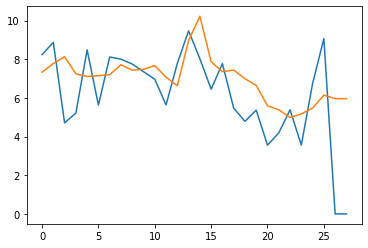

In [17]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

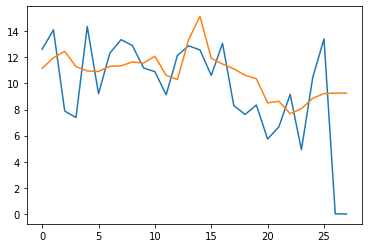

In [18]:
plt.plot(np.arange(len(y_true2)), y_true2)
plt.plot(np.arange(len(y_pred2)), y_pred2)
plt.show()

In [19]:
#Comparison with simple Ridge model
ridge = Ridge(alpha=2e-05)
ridge.fit(X_train.values, y_train1.values)
preds = ridge.predict(X_test.values)
mse = mean_squared_error(y_true1, preds)
mae = mean_absolute_error(y_true1, preds)
print("MSE: {}".format(mse))
print("MAE: {}".format(mae))

MSE: 3.08798935784066
MAE: 1.3625139360393264


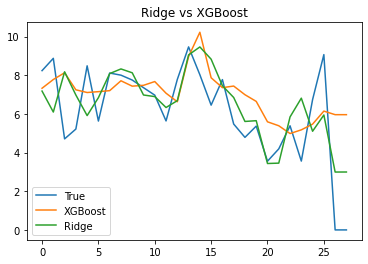

In [20]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.plot(np.arange(len(preds)), preds)
plt.title("Ridge vs XGBoost")
plt.legend(['True', 'XGBoost', 'Ridge'])
plt.show()